In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
%matplotlib inline

In [2]:
data_dir ='.\\data\\'

In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)

data_dir

WindowsPath('data')

In [4]:
list(data_dir.glob('normal/*'))

[WindowsPath('data/normal/1.jpg'),
 WindowsPath('data/normal/10.jpg'),
 WindowsPath('data/normal/100.jpg'),
 WindowsPath('data/normal/101.jpg'),
 WindowsPath('data/normal/102.jpg'),
 WindowsPath('data/normal/103.jpg'),
 WindowsPath('data/normal/104.jpg'),
 WindowsPath('data/normal/105.jpg'),
 WindowsPath('data/normal/106.jpg'),
 WindowsPath('data/normal/107.jpg'),
 WindowsPath('data/normal/108.jpg'),
 WindowsPath('data/normal/109.jpg'),
 WindowsPath('data/normal/11.jpg'),
 WindowsPath('data/normal/110.jpg'),
 WindowsPath('data/normal/111.jpg'),
 WindowsPath('data/normal/112.jpg'),
 WindowsPath('data/normal/113.jpg'),
 WindowsPath('data/normal/114.jpg'),
 WindowsPath('data/normal/115.jpg'),
 WindowsPath('data/normal/116.jpg'),
 WindowsPath('data/normal/117.jpg'),
 WindowsPath('data/normal/118.jpg'),
 WindowsPath('data/normal/119.jpg'),
 WindowsPath('data/normal/12.jpg'),
 WindowsPath('data/normal/120.jpg'),
 WindowsPath('data/normal/121.jpg'),
 WindowsPath('data/normal/122.jpg'),
 Windo

In [5]:
train_images_dic = {
'NORMAL': list(data_dir.glob('normal/*')),
'POTHOLES': list(data_dir.glob('potholes/*'))
}

In [6]:
labels_dic = {
'NORMAL': 0,
'POTHOLES': 1
}

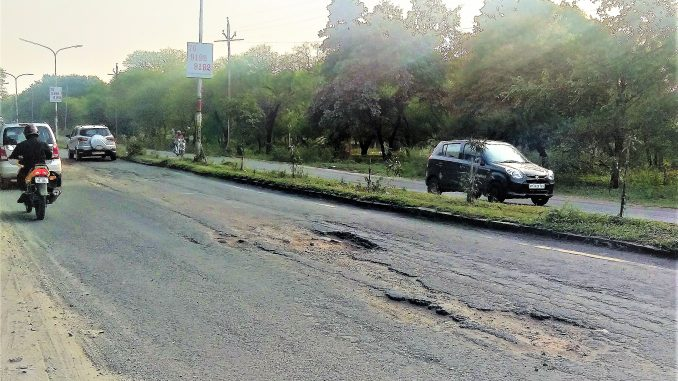

In [7]:
PIL.Image.open(str(train_images_dic['POTHOLES'][226]))

In [8]:
img = cv2.imread(str(train_images_dic['NORMAL'][226]))
img.shape

(300, 480, 3)

In [9]:
X, y = [], []

for label, images in train_images_dic.items():
    print(label, len(images))

    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dic[label])  

NORMAL 351
POTHOLES 329


In [10]:
len(X)

680

In [11]:
X=np.array(X)
y=np.array(y)
type(y)

numpy.ndarray

In [12]:
np.unique(y, return_counts=True)

(array([0, 1]), array([351, 329], dtype=int64))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
X_train.shape, X_test.shape

((544, 180, 180, 3), (136, 180, 180, 3))

In [15]:
X_train_scaled = X_train / 255 
X_test_scaled = X_test / 255 

X_train_scaled

array([[[[0.57647059, 0.61176471, 0.65882353],
         [0.44313725, 0.4745098 , 0.53333333],
         [0.52156863, 0.56862745, 0.62352941],
         ...,
         [0.45490196, 0.49019608, 0.5254902 ],
         [0.52941176, 0.56470588, 0.6       ],
         [0.5372549 , 0.57254902, 0.60784314]],

        [[0.1254902 , 0.16078431, 0.21176471],
         [0.79607843, 0.81568627, 0.85490196],
         [0.7372549 , 0.74117647, 0.79607843],
         ...,
         [0.49411765, 0.52941176, 0.56470588],
         [0.52941176, 0.56470588, 0.6       ],
         [0.46666667, 0.49803922, 0.5372549 ]],

        [[0.32941176, 0.37254902, 0.41960784],
         [0.73333333, 0.76078431, 0.79215686],
         [0.67843137, 0.67843137, 0.73333333],
         ...,
         [0.49803922, 0.53333333, 0.56862745],
         [0.44705882, 0.48235294, 0.51764706],
         [0.49411765, 0.52941176, 0.56470588]],

        ...,

        [[0.58039216, 0.60392157, 0.62352941],
         [0.6       , 0.62352941, 0.64313725]

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([

    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(35, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(69, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Dense network
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
14/14 [==============================] - 29s 2s/step - loss: 0.7344 - accuracy: 0.5770 - val_loss: 0.6188 - val_accuracy: 0.8624
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.5453 - accuracy: 0.7264 - val_loss: 0.4833 - val_accuracy: 0.6697
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.3714 - accuracy: 0.8437 - val_loss: 0.2688 - val_accuracy: 0.8716
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.2129 - accuracy: 0.9195 - val_loss: 0.2489 - val_accuracy: 0.9083
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.2017 - accuracy: 0.9264 - val_loss: 0.2764 - val_accuracy: 0.8716
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.1251 - accuracy: 0.9563 - val_loss: 0.5560 - val_accuracy: 0.7706
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.1739 - accuracy: 0.9287 - val_loss: 0.3182 - val_accuracy: 0.8532
Epoch 8/10
14/14 [==

In [18]:
model.evaluate(X_test_scaled, y_test)

5/5 [==============================] - 1s 255ms/step - loss: 0.2862 - accuracy: 0.8971


[0.2861984670162201, 0.8970588445663452]

In [24]:
model.predict(X_test_scaled)

5/5 [==============================] - 2s 447ms/step


array([[1.19437285e-01, 9.91365671e-01],
       [2.52515018e-01, 9.89728570e-01],
       [2.85051167e-01, 9.77872550e-01],
       [3.31526220e-01, 1.29011974e-01],
       [3.77837092e-01, 3.49873126e-01],
       [1.40443355e-01, 9.94062424e-01],
       [1.99395090e-01, 9.79830384e-01],
       [2.19880089e-01, 9.93949056e-01],
       [9.99876142e-01, 4.51653993e-14],
       [8.24281991e-01, 2.17230816e-04],
       [1.39353439e-01, 9.98491943e-01],
       [6.89063430e-01, 4.29810971e-01],
       [3.25264573e-01, 9.40208375e-01],
       [2.06212476e-01, 9.82209802e-01],
       [9.50548649e-01, 7.31982084e-07],
       [9.31024313e-01, 1.54128030e-03],
       [9.58088577e-01, 2.37223776e-06],
       [6.61924958e-01, 6.68771341e-02],
       [1.21863410e-01, 9.95124221e-01],
       [9.94712234e-01, 9.56960466e-09],
       [3.72562736e-01, 1.83039293e-01],
       [2.08664492e-01, 9.82868314e-01],
       [9.17090774e-01, 3.57516583e-05],
       [1.15635701e-01, 9.97466743e-01],
       [5.115618

In [21]:
from sklearn.metrics import classification_report

y_pred_values = model.predict(X_test_scaled)
y_pred_class = [np.argmax(element) for element in y_pred_values]

print(classification_report(y_test, y_pred_class))

5/5 [==============================] - 2s 297ms/step
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        68
           1       0.88      0.93      0.90        68

    accuracy                           0.90       136
   macro avg       0.90      0.90      0.90       136
weighted avg       0.90      0.90      0.90       136

